In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')
import glob
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn pyarrow seaborn imblearn xgboost| grep -v 'already satisfied'

#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

<Axes: >

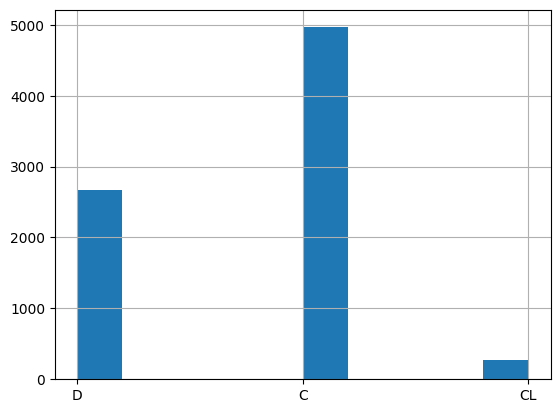

In [5]:
df["Status"].hist()

In [6]:
# unbalanced init!

In [7]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [8]:
df.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [9]:
NaN_count = df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [10]:
# nothing empty! lez go

In [11]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [12]:
# create train and validation sets that are divided equally

In [13]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(df, stratify=df["Status"], test_size=0.2)

In [14]:
# Distribution in the train and validation set

Text(0.5, 0.98, 'Distribution of Disruptions in Training and Test Sets')

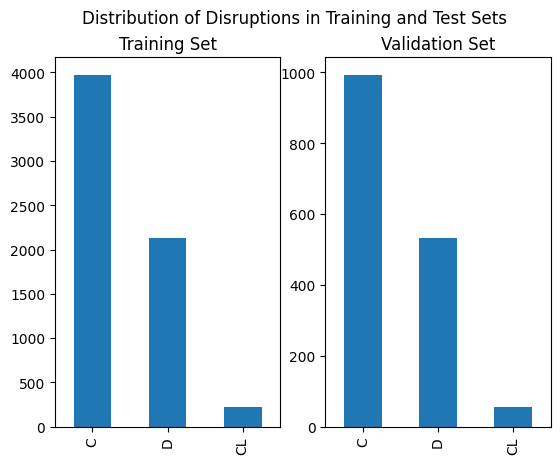

In [15]:
plt.subplot(1,2,1)
#train['Status'].hist()
train["Status"].value_counts().plot(kind="bar")

plt.title("Training Set")

plt.subplot(1,2,2)
#validation["Status"].hist()
validation["Status"].value_counts().plot(kind="bar")

plt.title("Validation Set")

plt.suptitle("Distribution of Disruptions in Training and Test Sets")

In [16]:
#the distribution is similar in training and test set

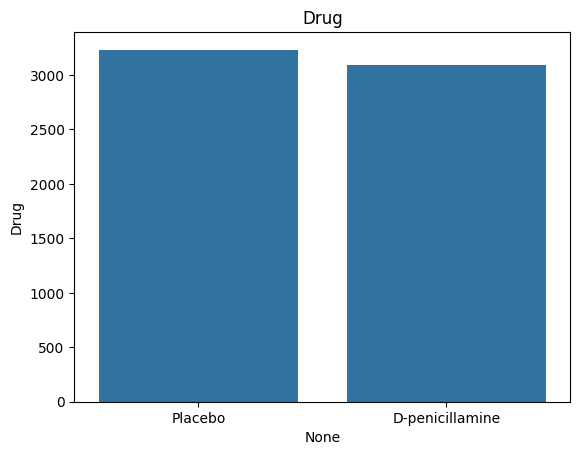

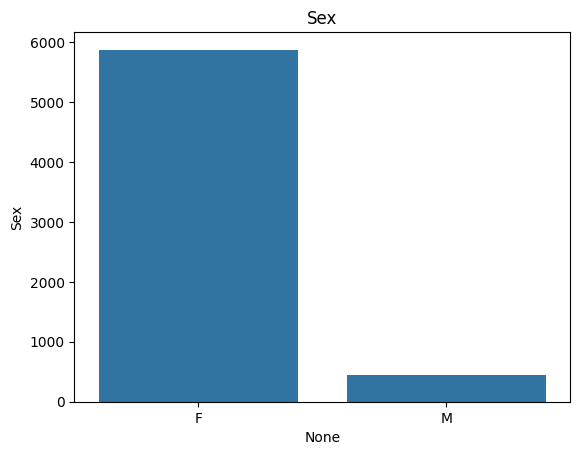

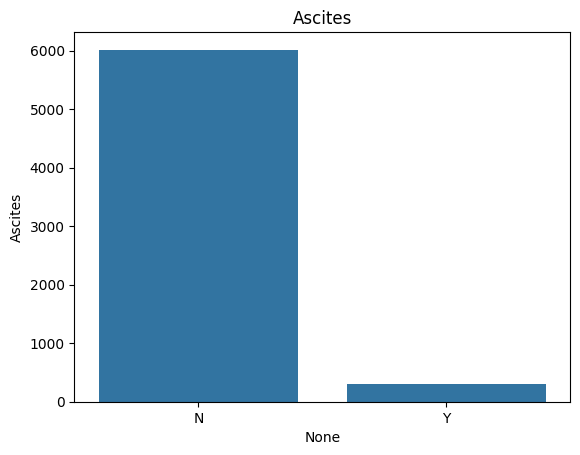

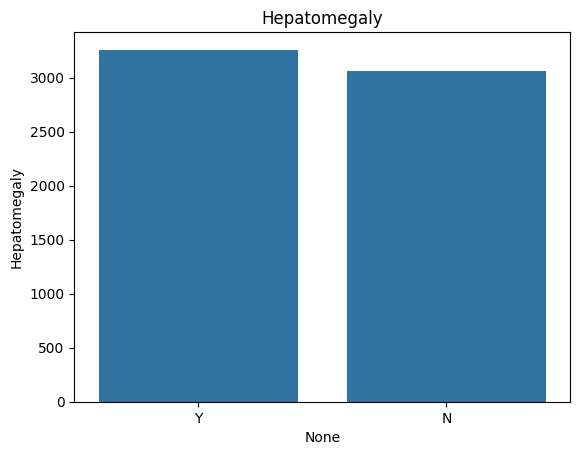

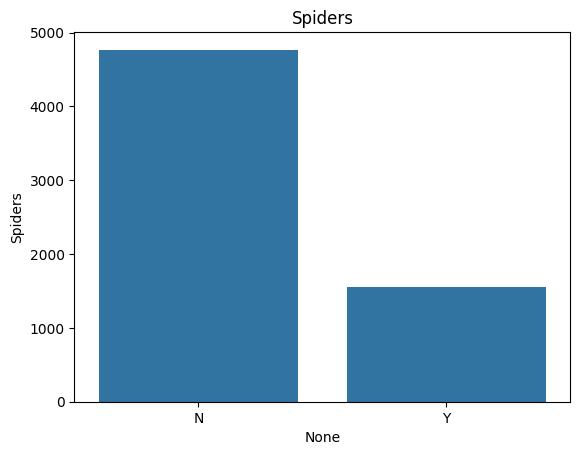

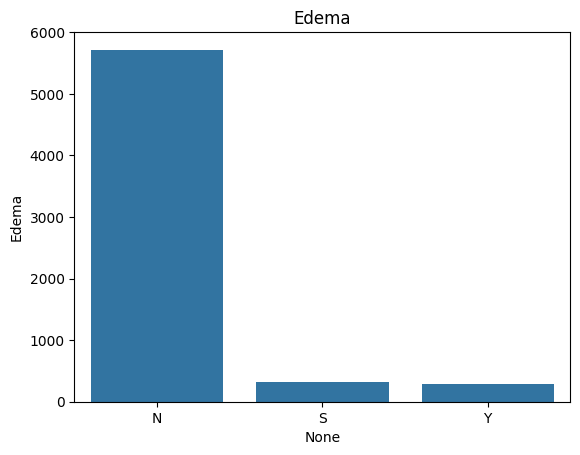

In [17]:
import seaborn as sns

categorical_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]

for i in categorical_values:
    sns.barplot(x=train[i].value_counts().index,y=train[i].value_counts()).set_title(i)
    plt.show()

In [18]:
# i should have done the stratified split which included sex, ascites, spiders, edema

In [19]:
# Will do it in the next iteration

In [20]:
train.Drug.replace(("Placebo", "D-penicillamine"), (0,1), inplace = True)
train.Sex.replace(("F", "M"), (0,1), inplace = True)
train.Ascites.replace(("N", "Y"), (0,1), inplace = True)
train.Hepatomegaly.replace(("N", "Y"), (0,1), inplace = True)
train.Spiders.replace(("N", "Y"), (0,1), inplace = True)
# train.Edema.replace(("N", "Y", "S"), (0,1,2), inplace = True)

In [21]:
#one hot encode the status and edema

In [22]:
status_dummies = pd.get_dummies(train.Status)
edema_dummies = pd.get_dummies(train.Edema)
train = pd.concat([train, edema_dummies, status_dummies], axis=1)

In [23]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,N,S,Y,C,CL,D
6199,6199,3707,0,13486,0,0,1,0,S,0.7,276.0,3.51,52.0,1636.0,116.25,56.0,467.0,11.0,4.0,C,0,1,0,1,0,0
3343,3343,2400,1,18460,0,0,0,1,N,3.3,260.0,3.50,231.0,3228.0,105.78,94.0,348.0,9.9,3.0,D,1,0,0,0,0,1
860,860,769,0,16718,0,0,1,0,N,0.8,273.0,3.65,48.0,794.0,52.70,214.0,269.0,10.6,4.0,C,1,0,0,1,0,0
7309,7309,1301,0,13378,0,0,1,0,N,0.8,372.0,4.01,38.0,876.0,97.65,44.0,156.0,10.2,2.0,C,1,0,0,1,0,0
5164,5164,1657,0,17320,0,0,0,0,N,0.6,263.0,3.65,27.0,1082.0,100.75,69.0,231.0,9.8,3.0,C,1,0,0,1,0,0


In [24]:
train.N.replace((False,True), (0,1), inplace = True)
train.S.replace((False,True), (0,1), inplace = True)
train.Y.replace((False,True), (0,1), inplace = True)
train.C.replace((False,True), (0,1), inplace = True)
train.CL.replace((False,True), (0,1), inplace = True)
train.D.replace((False,True), (0,1), inplace = True)

In [25]:
train = train.drop("Edema",axis = 1)
train = train.drop("Status",axis = 1)

In [26]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
6199,6199,3707,0,13486,0,0,1,0,0.7,276.0,3.51,52.0,1636.0,116.25,56.0,467.0,11.0,4.0,0,1,0,1,0,0
3343,3343,2400,1,18460,0,0,0,1,3.3,260.0,3.50,231.0,3228.0,105.78,94.0,348.0,9.9,3.0,1,0,0,0,0,1
860,860,769,0,16718,0,0,1,0,0.8,273.0,3.65,48.0,794.0,52.70,214.0,269.0,10.6,4.0,1,0,0,1,0,0
7309,7309,1301,0,13378,0,0,1,0,0.8,372.0,4.01,38.0,876.0,97.65,44.0,156.0,10.2,2.0,1,0,0,1,0,0
5164,5164,1657,0,17320,0,0,0,0,0.6,263.0,3.65,27.0,1082.0,100.75,69.0,231.0,9.8,3.0,1,0,0,1,0,0


In [27]:
train.dtypes

id                 int64
N_Days             int64
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
N                  uint8
S                  uint8
Y                  uint8
C                  uint8
CL                 uint8
D                  uint8
dtype: object

In [28]:
numeric_values = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

In [29]:
#visualise corelation matrix

In [30]:
train.corr()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
id,1.000000,-0.014197,0.008641,-0.000141,-0.002374,0.009130,0.008869,0.015061,0.009658,-0.008090,-0.015893,0.011130,-0.012239,0.016348,0.007240,-0.004268,0.003322,-0.003521,0.000367,-0.008017,0.008014,-0.009543,0.013510,0.004520
N_Days,-0.014197,1.000000,-0.005675,-0.105302,-0.061738,-0.266188,-0.286886,-0.198398,-0.350788,-0.141333,0.253170,-0.286449,-0.032742,-0.240152,-0.188620,0.143825,-0.157987,-0.225787,0.250168,-0.097336,-0.252515,0.349940,-0.075588,-0.328477
Drug,0.008641,-0.005675,1.000000,0.087904,0.028876,0.050446,-0.069896,-0.008649,-0.037946,-0.000597,-0.026423,-0.010100,0.005220,-0.041854,-0.057336,-0.013915,-0.043444,-0.040514,-0.030852,0.010166,0.033098,-0.024239,0.030098,0.013115
Age,-0.000141,-0.105302,0.087904,1.000000,0.106793,0.152653,0.103032,0.043065,0.097449,-0.056356,-0.114162,0.091921,0.029155,-0.028672,0.020327,-0.089937,0.139521,0.115795,-0.141735,0.078696,0.117990,-0.135541,-0.106689,0.179932
Sex,-0.002374,-0.061738,0.028876,0.106793,1.000000,0.036689,0.067107,-0.027058,0.035682,0.019295,-0.018294,0.160136,0.002667,0.061959,0.061634,-0.056634,0.078616,0.043466,-0.055908,0.080842,-0.006486,-0.130011,0.011101,0.128620
Ascites,0.009130,-0.266188,0.050446,0.152653,0.036689,1.000000,0.187937,0.200183,0.393818,-0.046861,-0.331858,0.286268,0.063909,0.128053,0.139910,-0.172578,0.291848,0.173392,-0.530701,0.080396,0.669941,-0.264736,-0.031112,0.282725
Hepatomegaly,0.008869,-0.286886,-0.069896,0.103032,0.067107,0.187937,1.000000,0.332880,0.300815,0.145065,-0.269457,0.283725,0.132412,0.210905,0.175703,-0.200714,0.254048,0.506125,-0.222191,0.131571,0.176232,-0.401907,0.032161,0.398442
Spiders,0.015061,-0.198398,-0.008649,0.043065,-0.027058,0.200183,0.332880,1.000000,0.256171,0.042564,-0.219106,0.264870,0.068982,0.147009,0.075843,-0.164625,0.276170,0.286684,-0.256807,0.127620,0.229721,-0.311670,0.013764,0.313315
Bilirubin,0.009658,-0.350788,-0.037946,0.097449,0.035682,0.393818,0.300815,0.256171,1.000000,0.305805,-0.302751,0.447238,0.129092,0.367270,0.326135,-0.082052,0.297563,0.198749,-0.325658,0.132618,0.322421,-0.422282,0.016733,0.425253
Cholesterol,-0.008090,-0.141333,-0.000597,-0.056356,0.019295,-0.046861,0.145065,0.042564,0.305805,1.000000,-0.082547,0.171281,0.136252,0.322192,0.267222,0.096179,0.018400,0.041196,0.036462,-0.005348,-0.046215,-0.187268,0.054866,0.170195


<Axes: >

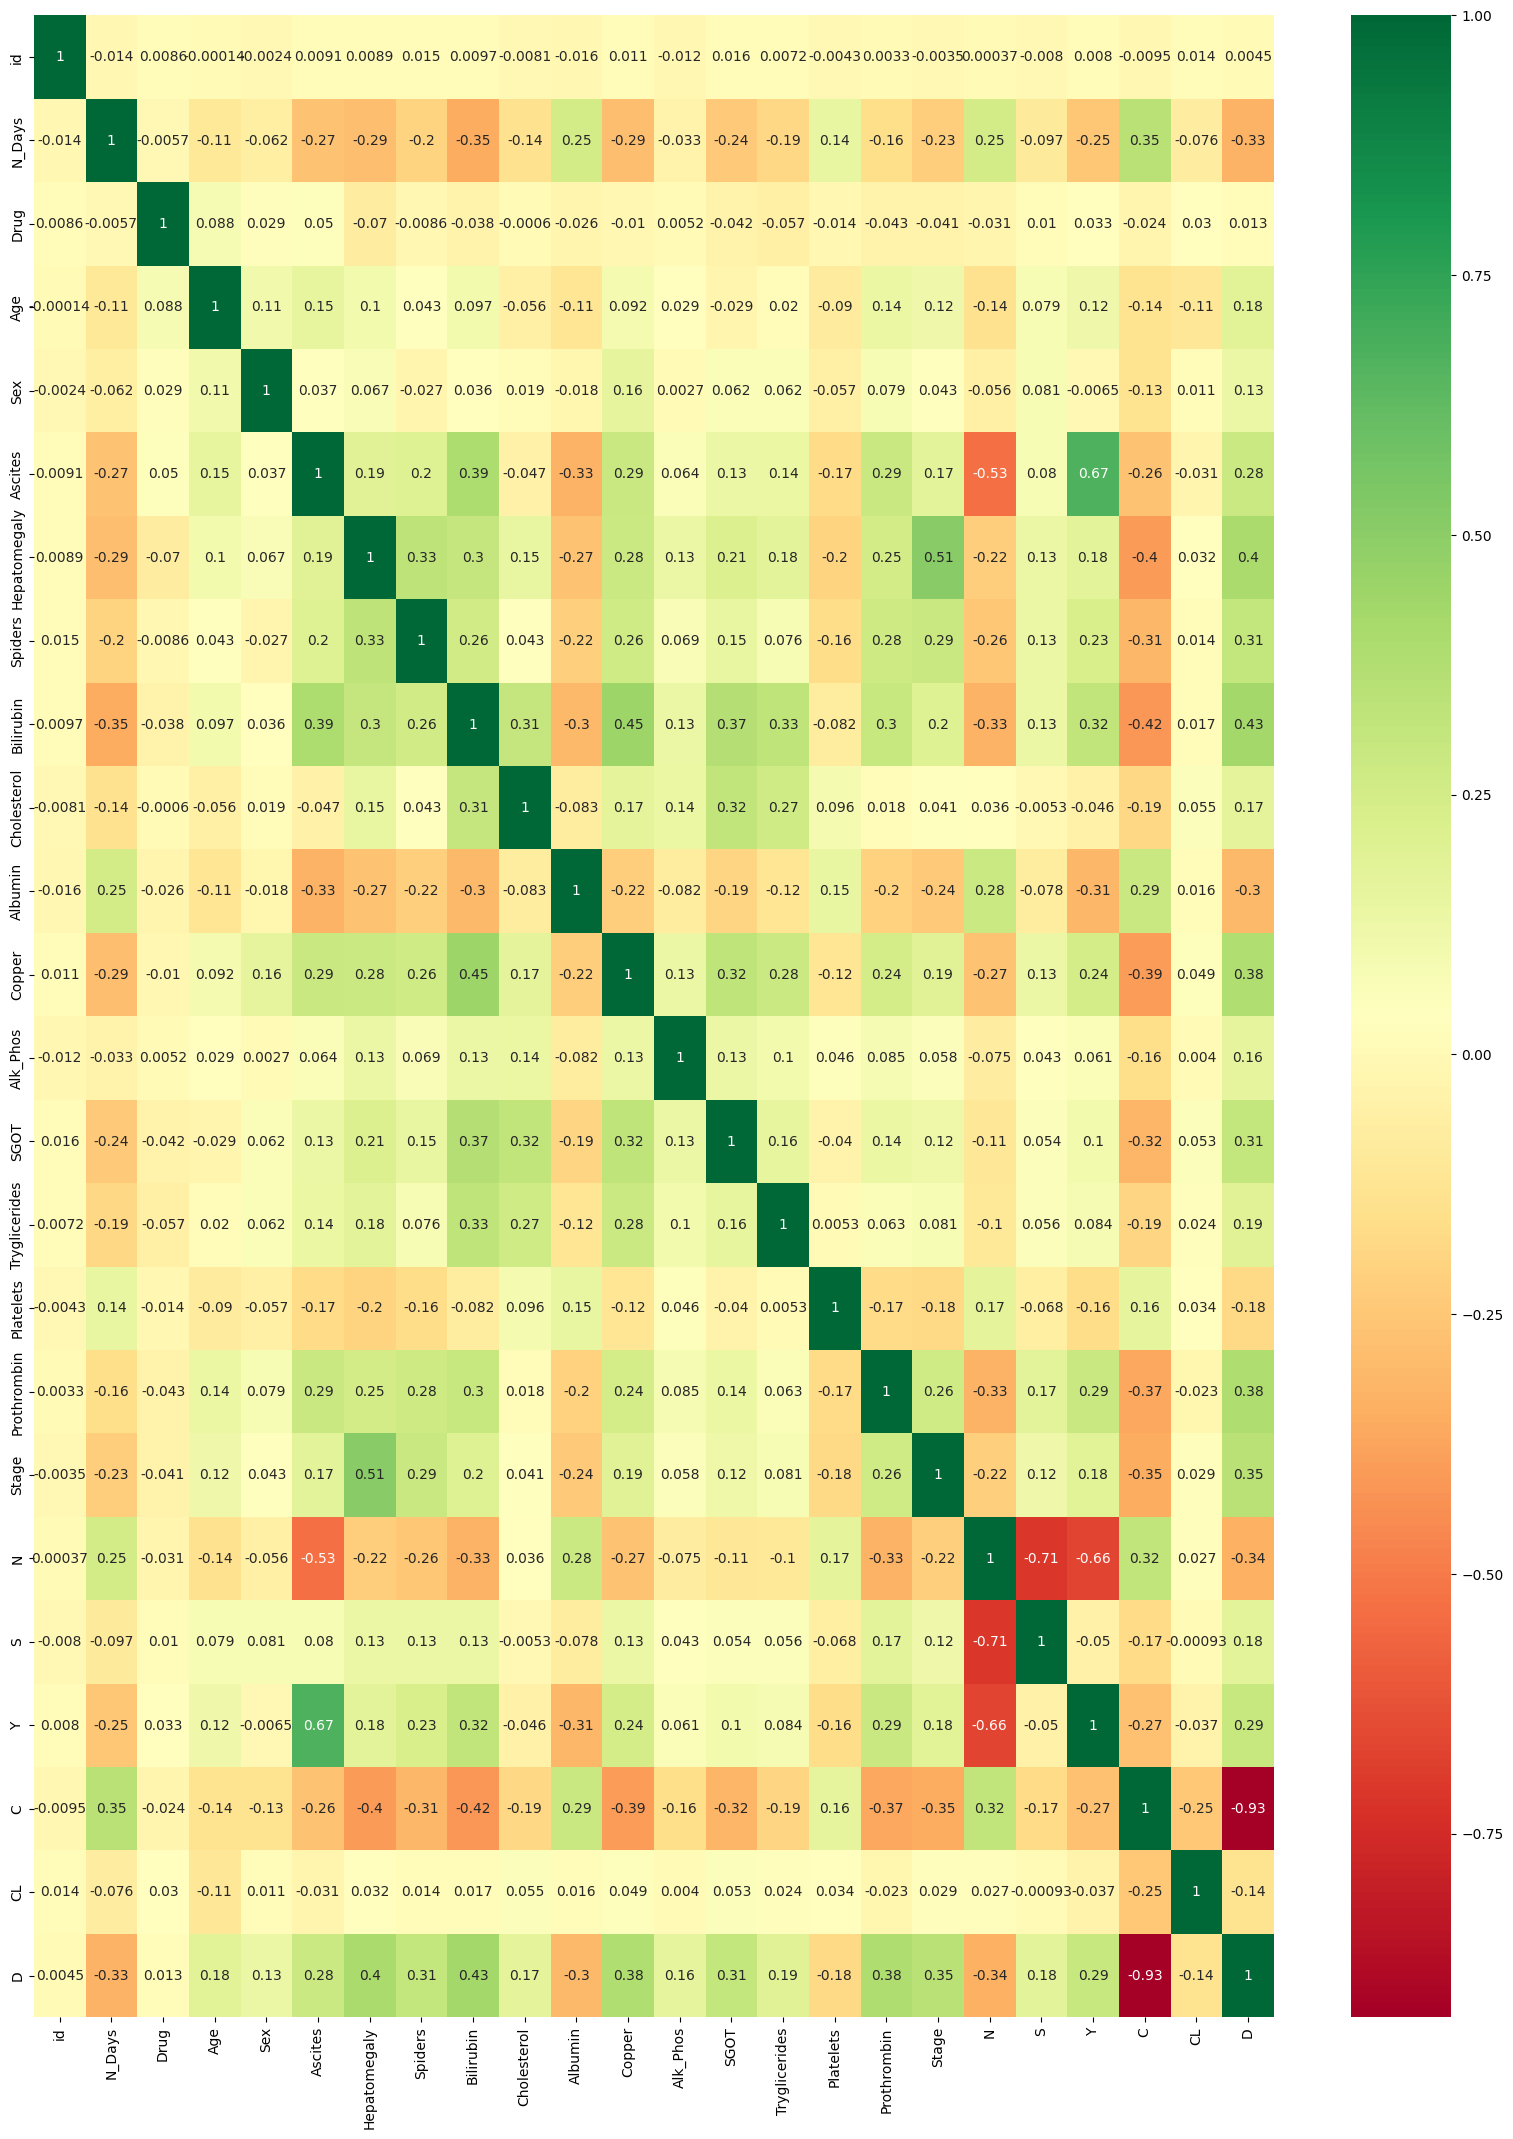

In [31]:
plt.figure(figsize=(20,26))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn")

In [32]:
features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

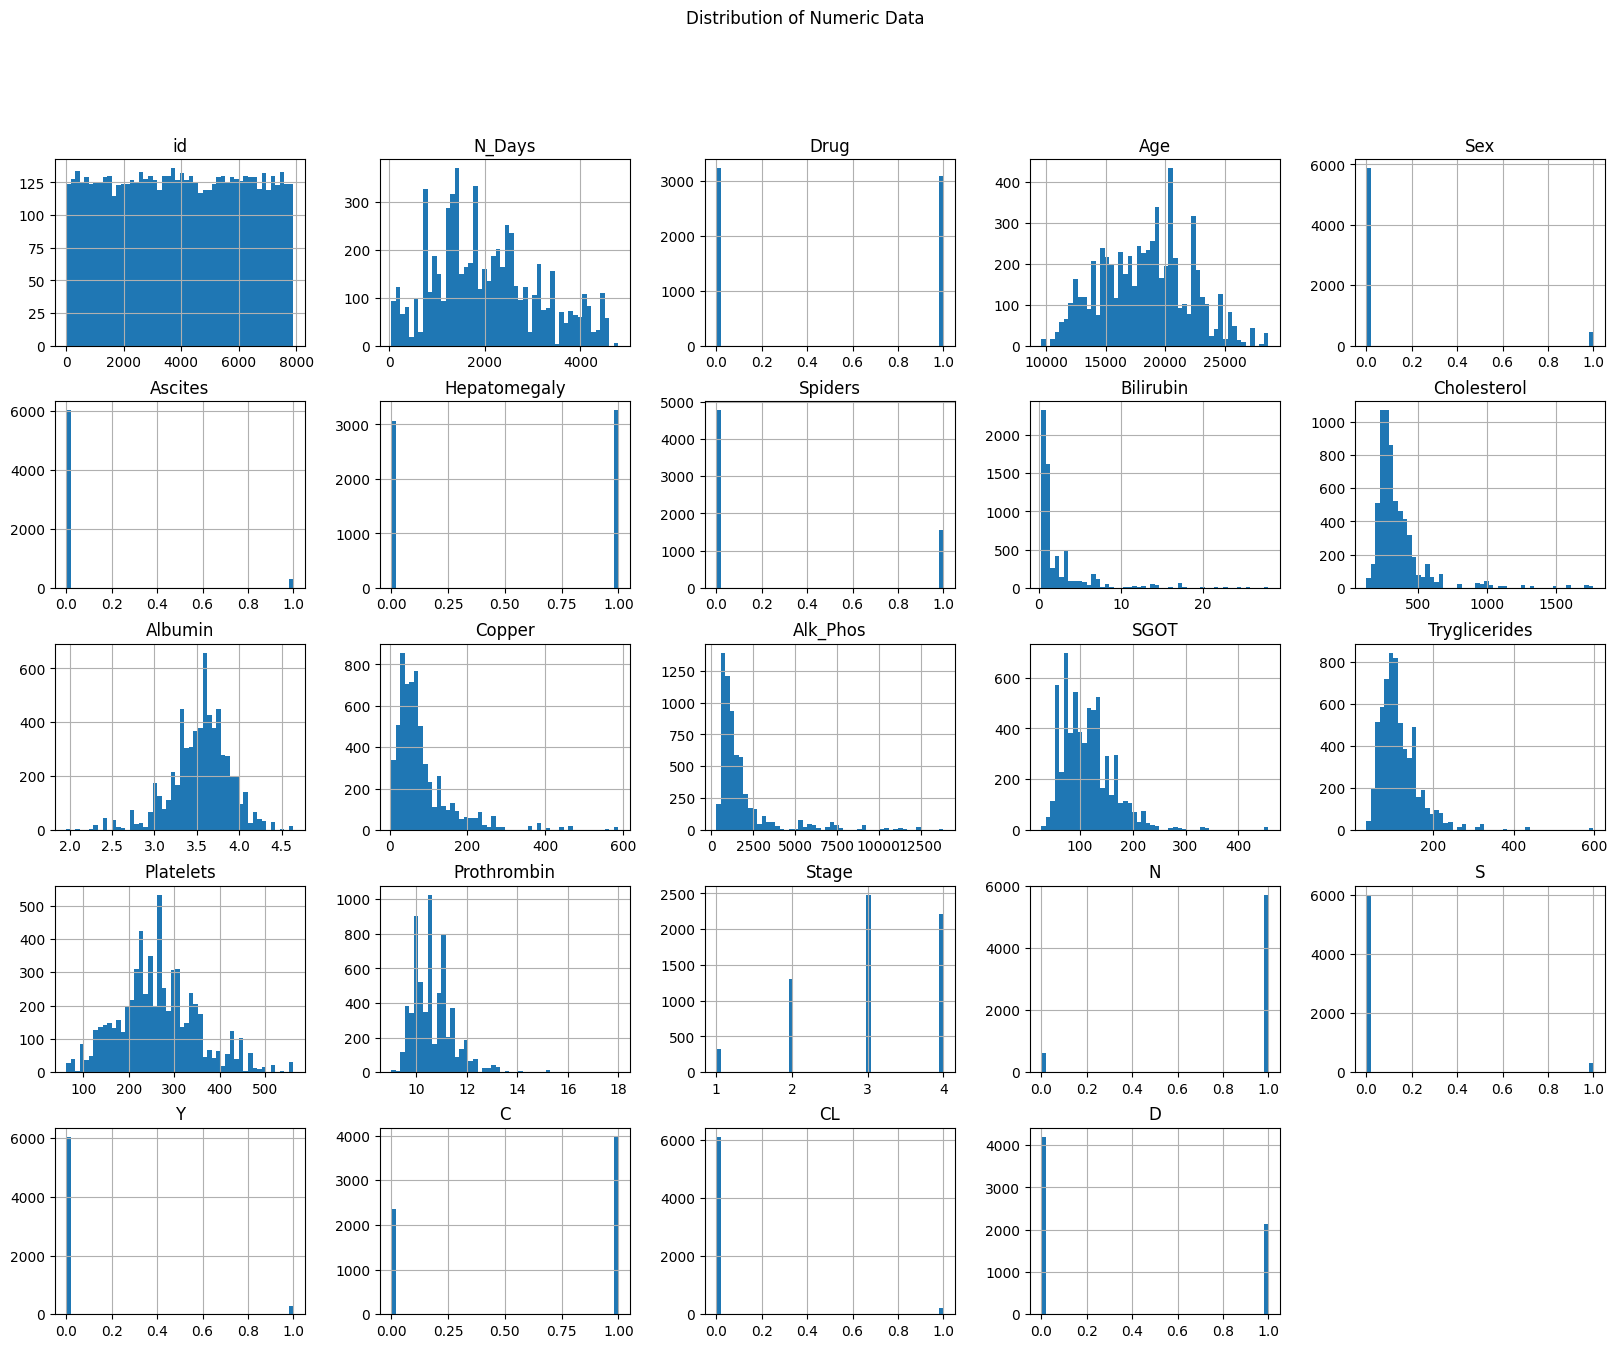

In [33]:
train.hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [34]:
#Most of the data here needs to be normalised, mostly right skewed

In [35]:
# lets look at the ones that matter

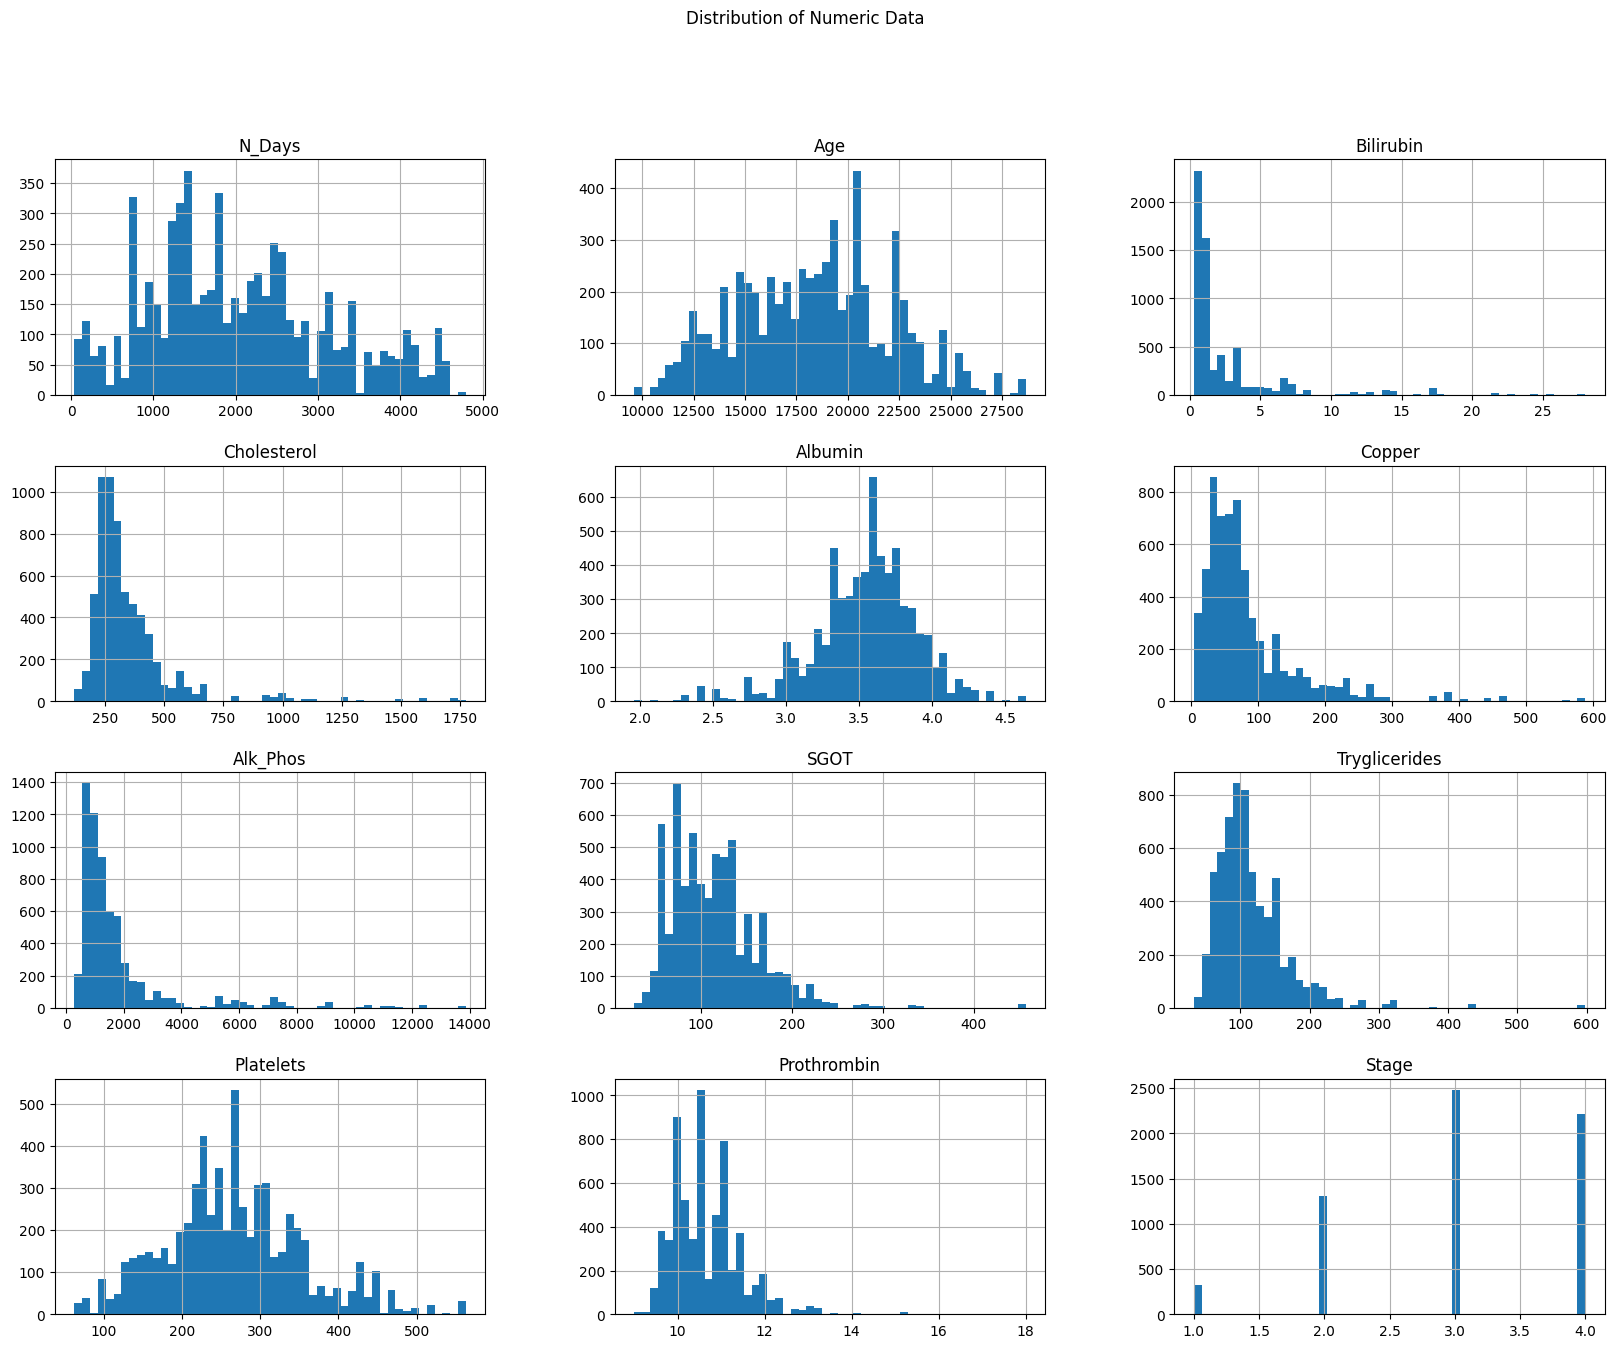

In [36]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]
# scaler_minmax = MinMaxScaler()
# train[features_to_scale] = scaler_minmax.fit_transform(train[features_to_scale])
transformer = FunctionTransformer(np.log1p)
train[features_to_scale] = transformer.transform(train[features_to_scale])

In [38]:
# viz after scaling

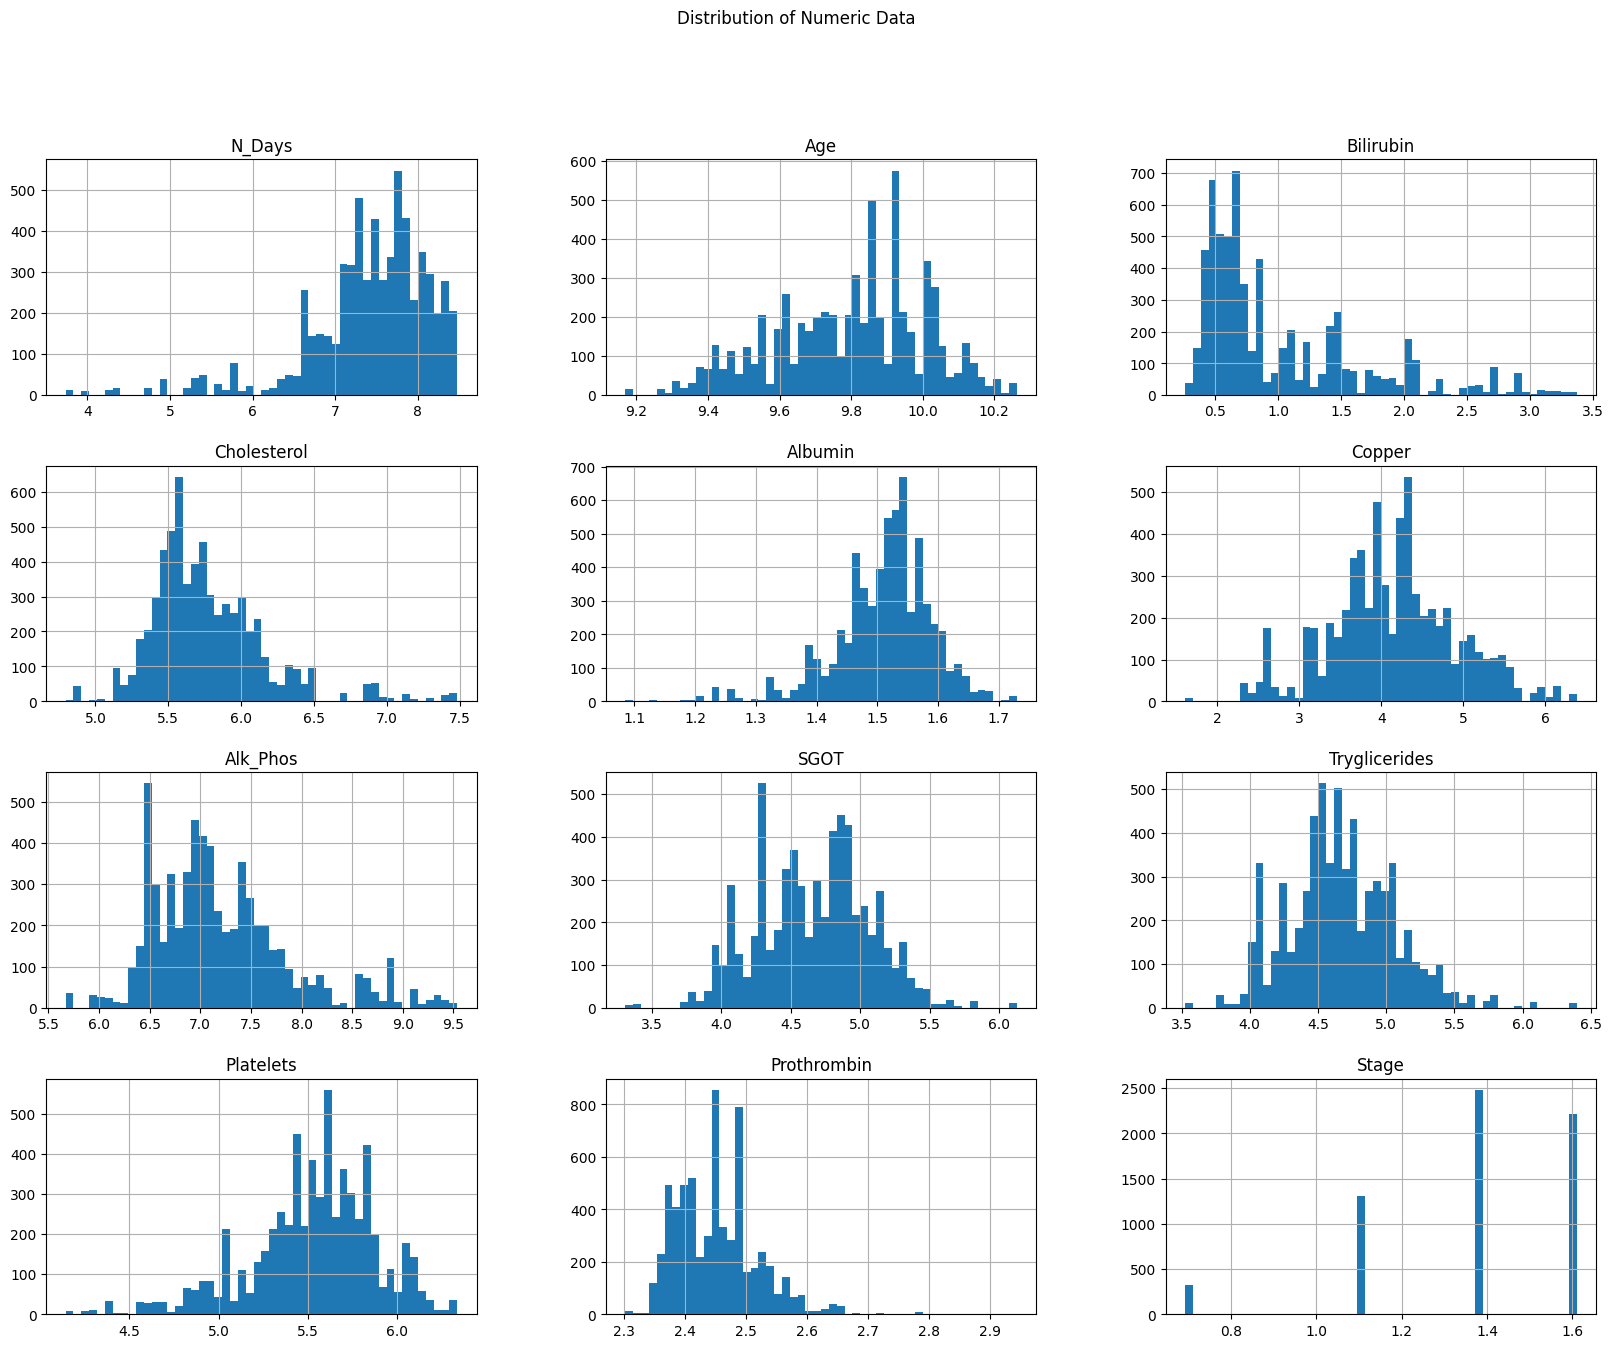

In [39]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [40]:
#looks scaled!!! atleast a bit, cause data is on a similar scale

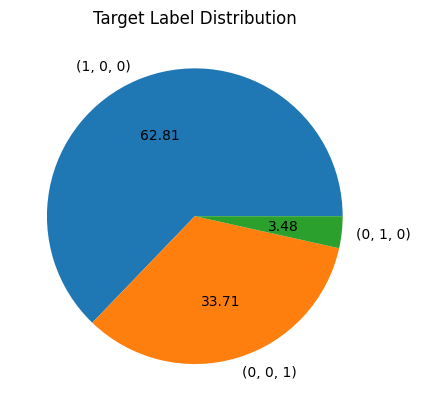

In [41]:
ax = train[["C","CL","D"]].value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("Target Label Distribution")

In [42]:
# looking at the target distribution, it looks like there's a big imbalence....... We need to balance the data ......

In [43]:
# for the next step i presume

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 6199 to 1927
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6324 non-null   int64  
 1   N_Days         6324 non-null   float64
 2   Drug           6324 non-null   int64  
 3   Age            6324 non-null   float64
 4   Sex            6324 non-null   int64  
 5   Ascites        6324 non-null   int64  
 6   Hepatomegaly   6324 non-null   int64  
 7   Spiders        6324 non-null   int64  
 8   Bilirubin      6324 non-null   float64
 9   Cholesterol    6324 non-null   float64
 10  Albumin        6324 non-null   float64
 11  Copper         6324 non-null   float64
 12  Alk_Phos       6324 non-null   float64
 13  SGOT           6324 non-null   float64
 14  Tryglicerides  6324 non-null   float64
 15  Platelets      6324 non-null   float64
 16  Prothrombin    6324 non-null   float64
 17  Stage          6324 non-null   float64
 18  N    

In [45]:
#This function randomly deletes attributes
def make_random_nans(df, percent_rows, percent_columns):
    num_rows_to_nan = int(percent_rows * len(df))
    num_columns_to_nan = int(percent_columns * len(df.columns))

    rows_to_nan = np.random.choice(df.index, num_rows_to_nan, replace=False)

    for row in rows_to_nan:
        columns_to_nan = np.random.choice(df.columns, num_columns_to_nan, replace=False)
        df.loc[row, columns_to_nan] = np.nan

In [46]:
#its better not to disturb the train set. Let's create a copy instead.
train_copy = train.copy()

In [47]:
# Making 10% of random attributes NaN in 10% of random rows
make_random_nans(train_copy, 0.1, 0.1)

In [48]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 6199 to 1927
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6275 non-null   float64
 1   N_Days         6283 non-null   float64
 2   Drug           6268 non-null   float64
 3   Age            6256 non-null   float64
 4   Sex            6278 non-null   float64
 5   Ascites        6271 non-null   float64
 6   Hepatomegaly   6264 non-null   float64
 7   Spiders        6285 non-null   float64
 8   Bilirubin      6267 non-null   float64
 9   Cholesterol    6281 non-null   float64
 10  Albumin        6260 non-null   float64
 11  Copper         6266 non-null   float64
 12  Alk_Phos       6268 non-null   float64
 13  SGOT           6271 non-null   float64
 14  Tryglicerides  6285 non-null   float64
 15  Platelets      6266 non-null   float64
 16  Prothrombin    6275 non-null   float64
 17  Stage          6269 non-null   float64
 18  N    

In [49]:
NaN_count = train_copy.isna().sum(axis = 0)
NaN_count

id               49
N_Days           41
Drug             56
Age              68
Sex              46
Ascites          53
Hepatomegaly     60
Spiders          39
Bilirubin        57
Cholesterol      43
Albumin          64
Copper           58
Alk_Phos         56
SGOT             53
Tryglicerides    39
Platelets        58
Prothrombin      49
Stage            55
N                59
S                56
Y                58
C                49
CL               50
D                48
dtype: int64

## KNN imputation

In [50]:
from sklearn.impute import KNNImputer

In [51]:
train_copy.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
6199,6199.0,8.218248,0.0,9.509482,0.0,0.0,1.0,0.0,0.530628,5.624018,1.506297,3.970292,7.400621,4.764308,4.043051,6.148468,2.484907,1.609438,0.0,1.0,0.0,1.0,0.0,0.0
3343,3343.0,7.783641,1.0,9.823416,0.0,0.0,0.0,1.0,1.458615,5.564520,1.504077,5.446737,8.079928,4.670771,4.553877,5.855072,2.388763,1.386294,1.0,0.0,0.0,0.0,0.0,1.0
860,860.0,6.646391,0.0,9.724301,0.0,0.0,1.0,0.0,0.587787,5.613128,1.536867,3.891820,6.678342,3.983413,5.370638,5.598422,2.451005,1.609438,1.0,0.0,0.0,1.0,0.0,0.0
7309,7309.0,7.171657,0.0,9.501442,0.0,0.0,1.0,0.0,0.587787,5.921578,1.611436,3.663562,6.776507,4.591578,3.806662,5.056246,2.415914,1.098612,1.0,0.0,0.0,1.0,0.0,0.0
5164,5164.0,7.413367,0.0,9.759675,0.0,0.0,0.0,0.0,0.470004,5.575949,1.536867,3.332205,6.987490,4.622519,4.248495,5.446737,2.379546,1.386294,1.0,0.0,0.0,1.0,0.0,0.0


In [64]:
# Initialise the KNNImputer
imputer = KNNImputer(n_neighbors=15)

In [65]:
# Fit on the dataset and transform it to impute missing values
KNN_imputed_data = imputer.fit_transform(train_copy)

In [66]:
# Convert the imputed data back to a pandas DataFrame
KNN_imputed_df = pd.DataFrame(KNN_imputed_data, columns=train.columns)

In [67]:
# Check no values are missing
NaN_count = KNN_imputed_df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N                0
S                0
Y                0
C                0
CL               0
D                0
dtype: int64

In [68]:
KNN_imputed_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
0,6199.0,8.218248,0.0,9.509482,0.0,0.0,1.0,0.0,0.530628,5.624018,1.506297,3.970292,7.400621,4.764308,4.043051,6.148468,2.484907,1.609438,0.0,1.0,0.0,1.0,0.0,0.0
1,3343.0,7.783641,1.0,9.823416,0.0,0.0,0.0,1.0,1.458615,5.564520,1.504077,5.446737,8.079928,4.670771,4.553877,5.855072,2.388763,1.386294,1.0,0.0,0.0,0.0,0.0,1.0
2,860.0,6.646391,0.0,9.724301,0.0,0.0,1.0,0.0,0.587787,5.613128,1.536867,3.891820,6.678342,3.983413,5.370638,5.598422,2.451005,1.609438,1.0,0.0,0.0,1.0,0.0,0.0
3,7309.0,7.171657,0.0,9.501442,0.0,0.0,1.0,0.0,0.587787,5.921578,1.611436,3.663562,6.776507,4.591578,3.806662,5.056246,2.415914,1.098612,1.0,0.0,0.0,1.0,0.0,0.0
4,5164.0,7.413367,0.0,9.759675,0.0,0.0,0.0,0.0,0.470004,5.575949,1.536867,3.332205,6.987490,4.622519,4.248495,5.446737,2.379546,1.386294,1.0,0.0,0.0,1.0,0.0,0.0


In [69]:
# measuring the MSE between the original and imputed dataframes 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train.values, KNN_imputed_df.values)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1896.5014075643937


## Median Imputation

In [57]:
from sklearn.impute import SimpleImputer

In [58]:
#Initialise the Simple Imputer with the median strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [59]:
#Fit on dataset and transform it to impute the missing value
Median_imputed_dataset = imputer.fit_transform(train_copy)

In [60]:
# Convert the imputed data back to a pandas DataFrame
Median_imputed_df = pd.DataFrame(Median_imputed_dataset, columns=train.columns)

In [61]:
# Check no values are missing
NaN_count = Median_imputed_df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N                0
S                0
Y                0
C                0
CL               0
D                0
dtype: int64

In [62]:
Median_imputed_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
0,6199.0,8.218248,0.0,9.509482,0.0,0.0,1.0,0.0,0.530628,5.624018,1.506297,3.970292,7.400621,4.764308,4.043051,6.148468,2.484907,1.609438,0.0,1.0,0.0,1.0,0.0,0.0
1,3343.0,7.783641,1.0,9.823416,0.0,0.0,0.0,1.0,1.458615,5.564520,1.504077,5.446737,8.079928,4.670771,4.553877,5.855072,2.388763,1.386294,1.0,0.0,0.0,0.0,0.0,1.0
2,860.0,6.646391,0.0,9.724301,0.0,0.0,1.0,0.0,0.587787,5.613128,1.536867,3.891820,6.678342,3.983413,5.370638,5.598422,2.451005,1.609438,1.0,0.0,0.0,1.0,0.0,0.0
3,7309.0,7.171657,0.0,9.501442,0.0,0.0,1.0,0.0,0.587787,5.921578,1.611436,3.663562,6.776507,4.591578,3.806662,5.056246,2.415914,1.098612,1.0,0.0,0.0,1.0,0.0,0.0
4,5164.0,7.413367,0.0,9.759675,0.0,0.0,0.0,0.0,0.470004,5.575949,1.536867,3.332205,6.987490,4.622519,4.248495,5.446737,2.379546,1.386294,1.0,0.0,0.0,1.0,0.0,0.0


Mean Squared Error: 2296.2219193156725
